In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
import numpy as np

For finding the optimal power points, I simply calculated values of I-V values (and the corresponding power output) along the curve (based on increasing V-diode values). I stored each point as a 3-tuple (power, I, V), in a list, and then sorted the list by power. I then selected the last value in the list (i.e. with the highest power). Then, I applied a modified version of hill climbing to arrive at the optimal power point. Unlike traditional hill climbing, I restrict my hill climb to a step size of +/- 1/n on the nth step, and I restrict the process to a 100 steps. The underlying assumption is that the initial starting point is not far from the point of optimality, so the result of this 100-iteration run should be fairly accurate. The points of optimal power generation that I calculated through this process are displayed below in the graphs.

In [4]:
import matplotlib.pyplot as plt

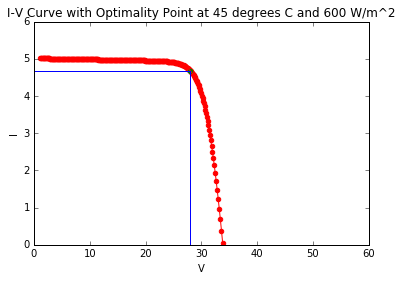

In [48]:
v_values = np.array([1.1308480405878272, 1.230952204448065, 1.3310563683117544, 1.4311605321791452, 1.531264696050504, 1.6313688599261191, 1.7314730238062965, 1.8315771876913676, 1.9316813515816842, 2.031785515477627, 2.1318896793796016, 2.2319938432880444, 2.3320980072034225, 2.432202171126238, 2.5323063350570263, 2.6324104989963666, 2.7325146629448747, 2.8326188269032144, 2.932722990872096, 3.0328271548522814, 3.132931318844587, 3.23303548284989, 3.333139646869128, 3.43324381090331, 3.5333479749535144, 3.6334521390209003, 3.733556303106709, 3.8336604672122725, 3.9337646313390175, 4.033868795488476, 4.133972959662289, 4.234077123862217, 4.3341812880901465, 4.434285452348101, 4.534389616638253, 4.634493780962927, 4.734597945324619, 4.834702109726005, 4.9348062741699525, 5.034910438659539, 5.13501460319806, 5.235118767789056, 5.335222932436317, 5.435327097143911, 5.535431261916197, 5.635535426757851, 5.735639591673888, 5.835743756669681, 5.935847921750995, 6.035952086924013, 6.13605625219536, 6.236160417572144, 6.336264583061986, 6.436368748673056, 6.536472914414114, 6.636577080294558, 6.7366812463244585, 6.836785412514619, 6.936889578876621, 7.036993745422885, 7.137097912166729, 7.237202079122429, 7.337306246305301, 7.437410413731761, 7.537514581419414, 7.637618749387137, 7.737722917655171, 7.837827086245222, 7.937931255180563, 8.038035424486146, 8.138139594188734, 8.23824376431702, 8.338347934901764, 8.43845210597596, 8.538556277574983, 8.638660449736763, 8.738764622501972, 8.83886879591422, 8.938972970020272, 9.039077144870271, 9.139181320517984, 9.239285497021065, 9.339389674441332, 9.439493852845075, 9.539598032303372, 9.63970221289244, 9.739806394694, 9.839910577795683, 9.940014762291456, 10.040118948282071, 10.140223135875566, 10.240327325187785, 10.340431516342946, 10.440535709474242, 10.540639904724497, 10.640744102246853, 10.74084830220552, 10.840952504776581, 10.941056710148839, 11.041160918524744, 11.14126513012138, 11.241369345171519, 11.341473563924755, 11.441577786648722, 11.541682013630396, 11.641786245177494, 11.741890481619974, 11.841994723311638, 11.942098970631863, 12.042203223987437, 12.142307483814557, 12.24241175058094, 12.342516024788104, 12.44262030697382, 12.542724597714718, 12.64282889762911, 12.74293320737999, 12.843037527678268, 12.943141859286238, 13.043246203021283, 13.143350559759867, 13.243454930441787, 13.343559316074776, 13.443663717739389, 13.543768136594277, 13.643872573881836, 13.743977030934248, 13.844081509179976, 13.944186010150723, 14.044290535488898, 14.144395086955601, 14.244499666439223, 14.34460427596463, 14.444708917703025, 14.544813593982541, 14.644918307299564, 14.745023060330904, 14.845127855946835, 14.945232697225068, 15.045337587465754, 15.145442530207555, 15.245547529244881, 15.345652588646375, 15.445757712774736, 15.545862906307963, 15.645968174262155, 15.746073522015932, 15.846178955336647, 15.946284480408476, 16.046390103862542, 16.14649583280922, 16.246601674872775, 16.346707638228498, 16.44681373164253, 16.546919964514572, 16.647026346923663, 16.747132889677292, 16.847239604364034, 16.94734650341, 17.047453600139374, 17.147560908839324, 17.24766844482959, 17.347776224537114, 17.447884265576064, 17.547992586833637, 17.648101208562053, 17.748210152477238, 17.848319441864575, 17.948429101692362, 18.048539158733426, 18.148649641695542, 18.248760581361285, 18.348872010737978, 18.448983965218474, 18.549096482753583, 18.649209604036926, 18.74932337270317, 18.84943783554059, 18.949553042718996, 19.049669048034108, 19.149785909169623, 19.249903687978215, 19.350022450782827, 19.450142268699768, 19.550263217985115, 19.650385380406217, 19.750508843639974, 19.85063370169997, 19.95076005539441, 20.050888012817232, 20.15101768987462, 20.251149210849647, 20.351282709007695, 20.451418327245623, 20.551556218787876, 20.65169654793288, 20.751839490853385, 20.85198523645468, 20.952133987294793, 21.052285960571215, 21.152441389178946, 21.252600522845, 21.35276362934489, 21.452930995807066, 21.553102930111596, 21.653279762389957, 21.75346184663319, 21.85364956241633, 21.953843316747417, 22.05404354605016, 22.154250718289905, 22.25446533525324, 22.354687934992345, 22.45491909444603, 22.55515943225017, 22.655409611751296, 22.755670344237938, 22.855942392405566, 22.9562265740719, 23.05652376616076, 23.15683490897385, 23.25716101077126, 23.35750315268301, 23.457862493975583, 23.55824027769909, 23.658637836742532, 23.759056600326755, 23.859498100966608, 23.95996398193633, 24.060456005274435, 24.160976060367183, 24.261526173152358, 24.362108515988254, 24.462725418235934, 24.563379377606257, 24.66407307232704, 24.76480937418954, 24.86559136253786, 24.966422339269407, 25.067305844919463, 25.168245675908285, 25.269245903034623, 25.37031089130591, 25.47144532120155, 25.57265421147305, 25.673942943591918, 25.775317287964516, 25.876783432041538, 25.978348010459033, 26.080018137357815, 26.181801441038683, 26.283706101122288, 26.385740888394658, 26.487915207532446, 26.5902391429161, 26.692723507754057, 26.795379896757296, 26.898220742620836, 27.001259376587328, 27.104510093387745, 27.20798822087552, 27.311710194693383, 27.415693638336553, 27.519957449002348, 27.624521889644413, 27.729408687679957, 27.834641140830875, 27.940244230614294, 28.046244744035455, 28.15267140407565, 28.259555009610967, 28.36692858544331, 28.474827543174673, 28.5832898537082, 28.692356232216497, 28.802070336478042, 28.91247897954806, 29.023632357799666, 29.135584295446282, 29.24839250673636, 29.362118877097725, 29.476829764601035, 29.59259632321091, 29.709494849399356, 29.827607153809993, 29.947020959783522, 30.067830330685847, 30.190136128120418, 30.314046503256975, 30.43967742367004, 30.567153238253624, 30.69660728296393, 30.82818253034095, 30.962032285972835, 31.098320935295845, 31.237224744367744, 31.378932718515408, 31.523647523039514, 31.671586470461182, 31.822982579119955, 31.978085708279675, 32.13716377527192, 32.30050406060594, 32.46841460740271, 32.64122572197034, 32.819291582830374, 33.00299196603325, 33.1927340951674, 33.38895462507398, 33.59212176893047, 33.802737579065024, 34.02134039261186])
i_values = np.array([5.0132814872082, 5.012972295570178, 5.012663103921909, 5.012353912262655, 5.012044720591621, 5.011735528907955, 5.011426337210745, 5.01111714549901, 5.010807953771703, 5.010498762027698, 5.010189570265787, 5.009880378484676, 5.0095711866829795, 5.009261994859207, 5.008952803011765, 5.0086436111389405, 5.008334419238902, 5.00802522730968, 5.007716035349167, 5.007406843355101, 5.007097651325058, 5.006788459256435, 5.006479267146447, 5.006170074992101, 5.005860882790196, 5.00555169053729, 5.005242498229699, 5.004933305863471, 5.004624113434368, 5.004314920937845, 5.00400572836903, 5.0036965357227, 5.003387342993248, 5.003078150174671, 5.0027689572605265, 5.002459764243906, 5.002150571117405, 5.001841377873083, 5.001532184502421, 5.001222990996292, 5.000913797344904, 5.000604603537758, 5.000295409563596, 4.99998621541035, 4.999677021065075, 4.999367826513894, 4.999058631741923, 4.998749436733209, 4.998440241470638, 4.998131045935865, 4.997821850109216, 4.997512653969598, 4.99720345749439, 4.996894260659339, 4.996585063438437, 4.996275865803799, 4.995966667725522, 4.995657469171543, 4.995348270107482, 4.995039070496473, 4.994729870298987, 4.994420669472638, 4.994111467971976, 4.993802265748265, 4.99349306274925, 4.993183858918897, 4.992874654197123, 4.9925654485195015, 4.992256241816951, 4.991947034015396, 4.9916378250354105, 4.991328614791823, 4.991019403193312, 4.990710190141951, 4.990400975532739, 4.990091759253086, 4.989782541182264, 4.989473321190819, 4.989164099139943, 4.988854874880794, 4.988545648253775, 4.988236419087752, 4.987927187199223, 4.987617952391426, 4.987308714453376, 4.986999473158841, 4.9866902282652354, 4.986380979512448, 4.98607172662156, 4.985762469293502, 4.985453207207584, 4.985143940019944, 4.984834667361864, 4.984525388837978, 4.984216104024349, 4.983906812466398, 4.983597513676692, 4.983288207132572, 4.982978892273602, 4.982669568498846, 4.98236023516393, 4.982050891577916, 4.981741536999924, 4.981432170635535, 4.981122791632909, 4.9808133990786425, 4.98050399199332, 4.980194569326739, 4.979885129952794, 4.979575672663997, 4.979266196165587, 4.978956699069228, 4.978647179886248, 4.9783376370203785, 4.97802806875999, 4.977718473269742, 4.977408848581655, 4.977099192585513, 4.976789503018592, 4.976479777454632, 4.97617001329202, 4.975860207741116, 4.975550357810669, 4.975240460293236, 4.974930511749566, 4.9746205084918405, 4.974310446565714, 4.974000321731047, 4.973690129441255, 4.973379864821155, 4.973069522643223, 4.972759097302123, 4.9724485827874085, 4.972137972654239, 4.971827259991986, 4.971516437390569, 4.971205496904361, 4.970894430013478, 4.970583227582279, 4.970271879814868, 4.969960376207365, 4.9696487054967475, 4.969336855605977, 4.969024813585177, 4.96871256554854, 4.968400096606693, 4.968087390794163, 4.967774430991607, 4.967461198842413, 4.967147674663285, 4.966833837348356, 4.966519664266378, 4.96620513115047, 4.965890211979917, 4.965574878853409, 4.965259101853126, 4.964942848898995, 4.964626085592427, 4.9643087750487425, 4.963990877717495, 4.963672351189814, 4.963353149991813, 4.9630332253630725, 4.962712525019115, 4.962390992896707, 4.962068568880763, 4.9617451885114985, 4.961420782670432, 4.961095277243683, 4.960768592760946, 4.960440644008356, 4.9601113396133965, 4.959780581599781, 4.959448264910195, 4.959114276894517, 4.9587784967610675, 4.958440794988199, 4.958101032693347, 4.957759060956497, 4.957414720094743, 4.9570678388844245, 4.956718233727039, 4.9563657077548795, 4.956010049872026, 4.955651033726034, 4.955288416605296, 4.954921938256723, 4.954551319617961, 4.954176261458, 4.953796442919513, 4.953411519955874, 4.953021123655183, 4.952624858443191, 4.952222300156325, 4.951812993975459, 4.951396452210343, 4.950972151923911, 4.950539532384888, 4.950097992336295, 4.94964688706653, 4.9491855252687795, 4.948713165673442, 4.948229013437171, 4.947732216270938, 4.947221860288274, 4.946696965553424, 4.946156481307786, 4.945599280851322, 4.945024156054056, 4.944429811470881, 4.943814858031049, 4.943177806271553, 4.942517059081502, 4.941830903922069, 4.941117504484191, 4.9403748917433115, 4.939600954367655, 4.938793428433252, 4.937949886395656, 4.937067725264607, 4.936144153924042, 4.935176179535688, 4.93416059296, 4.933093953123435, 4.931972570255884, 4.930792487916652, 4.92954946372137, 4.928238948676013, 4.926856065017303, 4.925395582451596, 4.923851892676456, 4.922218982060853, 4.920490402350859, 4.918659239258177, 4.916718078778442, 4.914658971075284, 4.912473391754148, 4.910152200337285, 4.9076855957375916, 4.905063068514427, 4.902273349678798, 4.899304355798564, 4.896143130136215, 4.892775779532519, 4.889187406728544, 4.885362037796416, 4.881282544325263, 4.87693055998332, 4.872286391049721, 4.867328920480174, 4.862035505039156, 4.856381864997572, 4.850341965858517, 4.843887891535027, 4.836989708361993, 4.829615319279832, 4.821730307479569, 4.813297768747685, 4.804278131694047, 4.794628964987157, 4.784304770657744, 4.773256762463778, 4.761432628237282, 4.748776275055231, 4.735227555993218, 4.720721977130776, 4.7051903833811295, 4.688558621614924, 4.670747179436906, 4.651670797855935, 4.631238055961513, 4.609350925583645, 4.58590429376667, 4.5607854507308465, 4.533873540827423, 4.505038973812596, 4.474142793572504, 4.441036001224104, 4.405558829294558, 4.367539963443402, 4.326795707936294, 4.283129090805058, 4.236328904335031, 4.186168676205557, 4.132405566271801, 4.074779183613685, 4.013010318089479, 3.9467995802150218, 3.8758259427429613, 3.799745176837663, 3.7181881752277963, 3.630759154168267, 3.5370337254525523, 3.4365568290837407, 3.328840516533525, 3.2133615737908126, 3.089558972621044, 2.956831137620417, 2.81453301575214, 2.6619729340892944, 2.4984092304576033, 2.3230466405646646, 2.135032424016465, 1.9334522103495242, 1.7173255448435862, 1.4856011124170398, 1.2371516163390173, 0.9707682868110605, 0.6851549926675384, 0.3789219275114728, 0.050578839528484076, -0.3014722280003579])
opt_v = np.array([27.9912821026])
opt_i = np.array([4.68012640388])
plt.scatter(v_values, i_values, color = "r")
plt.scatter(opt_v, opt_i, color = 'g')
plt.plot(v_values, i_values, color = "r")
xs = np.linspace(0,27.9912821026,100)
ys = np.array([4.6801264038 for t in xrange(len(xs))])
plt.plot(xs, ys, 'b')
ys = np.linspace(0,4.68012640388,100)
xs = np.array([27.9912821026 for t in xrange(len(ys))])
plt.plot(xs,ys,'b')
plt.ylabel("I")
plt.xlabel("V")
# x = numpy.linspace(0, 150, 1000)
plt.title("I-V Curve with Optimality Point at 45 degrees C and 600 W/m^2")
xlim(0, 60)
ylim(0, 6)
plt.show()

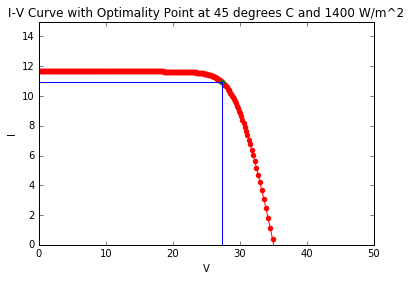

In [52]:
v_values = np.array([-1.124973664723497, -1.02486950086326, -0.9247653369995703, -0.82466117313218, -0.72455700926082, -0.6244528453852056, -0.5243486815050278, -0.4242445176199574, -0.3241403537296397, -0.22403618983369755, -0.12393202593172337, -0.023827862023280577, 0.07627630189209844, 0.17638046581491285, 0.27648462974570176, 0.3765887936850416, 0.47669295763355013, 0.5767971215918903, 0.676901285560771, 0.7770054495409564, 0.8771096135332628, 0.977213777538565, 1.0773179415578036, 1.177422105591985, 1.2775262696421898, 1.3776304337095762, 1.4777345977953846, 1.577838761900948, 1.677942926027694, 1.778047090177152, 1.8781512543509642, 1.978255418550892, 2.0783595827788215, 2.1784637470367776, 2.278567911326929, 2.378672075651603, 2.478776240013295, 2.578880404414681, 2.678984568858628, 2.779088733348214, 2.879192897886736, 2.9792970624777317, 3.0794012271249933, 3.1795053918325866, 3.279609556604872, 3.379713721446527, 3.4798178863625626, 3.5799220513583556, 3.6800262164396704, 3.780130381612688, 3.8802345468840356, 3.98033871226082, 4.080442877750661, 4.180547043361732, 4.28065120910279, 4.380755374983233, 4.4808595410131336, 4.580963707203294, 4.681067873565297, 4.781172040111561, 4.881276206855404, 4.981380373811104, 5.081484540993976, 5.181588708420437, 5.281692876108089, 5.381797044075812, 5.481901212343846, 5.582005380933898, 5.682109549869239, 5.782213719174822, 5.882317888877411, 5.982422059005694, 6.082526229590439, 6.182630400664636, 6.282734572263659, 6.382838744425438, 6.4829429171906465, 6.583047090602895, 6.683151264708947, 6.783255439558946, 6.883359615206659, 6.98346379170974, 7.083567969130007, 7.183672147533752, 7.283776326992048, 7.3838805075811145, 7.483984689382675, 7.58408887248436, 7.684193056980131, 7.784297242970746, 7.884401430564241, 7.98450561987646, 8.084609811031621, 8.184714004162917, 8.284818199413172, 8.38492239693553, 8.485026596894196, 8.585130799465256, 8.685235004837514, 8.785339213213419, 8.885443424810056, 8.985547639860194, 9.08565185861343, 9.185756081337397, 9.285860308319071, 9.385964539866169, 9.486068776308649, 9.586173018000315, 9.686277265320538, 9.786381518676114, 9.886485778503234, 9.986590045269615, 10.08669431947678, 10.186798601662495, 10.286902892403393, 10.387007192317785, 10.487111502068664, 10.587215822366943, 10.687320153974913, 10.78742449770996, 10.887528854448542, 10.987633225130462, 11.087737610763451, 11.187842012428064, 11.287946431282954, 11.388050868570513, 11.488155325622923, 11.58825980386865, 11.6883643048394, 11.788468830177573, 11.888573381644278, 11.988677961127898, 12.088782570653304, 12.188887212391702, 12.288991888671216, 12.38909660198824, 12.489201355019581, 12.589306150635512, 12.689410991913745, 12.789515882154431, 12.88962082489623, 12.989725823933558, 13.08983088333505, 13.18993600746341, 13.29004120099664, 13.390146468950832, 13.490251816704607, 13.590357250025322, 13.69046277509715, 13.790568398551216, 13.890674127497896, 13.99077996956145, 14.090885932917171, 14.190992026331205, 14.291098259203245, 14.391204641612338, 14.49131118436597, 14.59141789905271, 14.691524798098673, 14.791631894828049, 14.891739203528, 14.991846739518266, 15.09195451922579, 15.192062560264741, 15.29217088152231, 15.39227950325073, 15.492388447165913, 15.592497736553252, 15.692607396381039, 15.792717453422101, 15.892827936384219, 15.992938876049962, 16.09305030542665, 16.19316225990715, 16.29327477744226, 16.393387898725603, 16.493501667391847, 16.593616130229268, 16.693731337407673, 16.793847342722785, 16.8939642038583, 16.99408198266689, 17.094200745471504, 17.19432056338844, 17.294441512673792, 17.39456367509489, 17.49468713832865, 17.594811996388643, 17.69493835008309, 17.79506630750591, 17.895195984563294, 17.995327505538324, 18.09546100369637, 18.1955966219343, 18.295734513476553, 18.395874842621552, 18.496017785542058, 18.596163531143354, 18.696312281983467, 18.79646425525989, 18.896619683867623, 18.996778817533674, 19.096941924033565, 19.197109290495742, 19.297281224800273, 19.39745805707863, 19.497640141321867, 19.597827857105006, 19.69802161143609, 19.798221840738833, 19.898429012978582, 19.998643629941913, 20.098866229681022, 20.199097389134703, 20.299337726938848, 20.39958790643997, 20.499848638926615, 20.600120687094243, 20.700404868760575, 20.800702060849435, 20.901013203662526, 21.001339305459936, 21.101681447371682, 21.20204078866426, 21.302418572387765, 21.40281613143121, 21.50323489501543, 21.603676395655285, 21.704142276625007, 21.804634299963112, 21.90515435505586, 22.00570446784103, 22.10628681067693, 22.206903712924607, 22.30755767229493, 22.408251367015716, 22.508987668878216, 22.609769657226536, 22.71060063395808, 22.81148413960814, 22.912423970596958, 23.0134241977233, 23.114489185994586, 23.215623615890227, 23.316832506161727, 23.418121238280595, 23.519495582653192, 23.620961726730215, 23.72252630514771, 23.824196432046488, 23.925979735727356, 24.027884395810965, 24.12991918308333, 24.232093502221122, 24.334417437604777, 24.436901802442733, 24.53955819144597, 24.642399037309513, 24.745437671276004, 24.848688388076418, 24.952166515564198, 25.05588848938206, 25.15987193302523, 25.26413574369102, 25.36870018433309, 25.473586982368634, 25.57881943551955, 25.68442252530297, 25.79042303872413, 25.896849698764328, 26.003733304299644, 26.111106880131988, 26.21900583786335, 26.32746814839688, 26.436534526905174, 26.54624863116672, 26.656657274236736, 26.767810652488343, 26.879762590134956, 26.992570801425035, 27.1062971717864, 27.221008059289712, 27.336774617899586, 27.453673144088032, 27.571785448498666, 27.6911992544722, 27.812008625374524, 27.934314422809095, 28.058224797945652, 28.183855718358718, 28.311331532942297, 28.440785577652605, 28.572360825029627, 28.70621058066151, 28.842499229984522, 28.981403039056417, 29.123111013204085, 29.267825817728188, 29.41576476514986, 29.56716087380863, 29.72226400296835, 29.8813420699606, 30.04468235529461, 30.212592902091384, 30.385404016659017, 30.563469877519047, 30.747170260721926, 30.936912389856076, 31.13313291976265, 31.336300063619145, 31.5469158737537, 31.765518687300535, 31.992685748610185, 32.22903602118906, 32.47523320286614, 32.7319889588748, 33.00006638859885, 33.280283742870765, 33.573518409929804, 33.880711189457394, 34.20287087550938, 34.54107917067063, 34.8964959553699, 35.27036493802374])
i_values = np.array([11.709281487208198, 11.708972295570177, 11.708663103921909, 11.708353912262655, 11.70804472059162, 11.707735528907953, 11.707426337210743, 11.70711714549901, 11.706807953771701, 11.706498762027696, 11.706189570265787, 11.705880378484677, 11.705571186682977, 11.705261994859207, 11.704952803011764, 11.704643611138941, 11.7043344192389, 11.704025227309678, 11.703716035349167, 11.7034068433551, 11.703097651325056, 11.702788459256434, 11.702479267146446, 11.702170074992102, 11.701860882790195, 11.701551690537288, 11.701242498229698, 11.70093330586347, 11.700624113434365, 11.700314920937844, 11.70000572836903, 11.699696535722698, 11.699387342993248, 11.69907815017467, 11.698768957260524, 11.698459764243905, 11.698150571117406, 11.69784137787308, 11.697532184502421, 11.697222990996291, 11.696913797344903, 11.696604603537756, 11.696295409563595, 11.695986215410349, 11.695677021065075, 11.695367826513891, 11.695058631741922, 11.694749436733208, 11.694440241470637, 11.694131045935864, 11.693821850109215, 11.693512653969597, 11.69320345749439, 11.692894260659337, 11.692585063438436, 11.692275865803799, 11.691966667725522, 11.691657469171542, 11.69134827010748, 11.69103907049647, 11.690729870298986, 11.690420669472637, 11.690111467971974, 11.689802265748265, 11.68949306274925, 11.689183858918897, 11.688874654197122, 11.6885654485195, 11.68825624181695, 11.687947034015396, 11.687637825035408, 11.687328614791822, 11.687019403193311, 11.68671019014195, 11.686400975532738, 11.686091759253085, 11.685782541182263, 11.685473321190818, 11.685164099139941, 11.684854874880793, 11.684545648253774, 11.684236419087751, 11.683927187199224, 11.683617952391424, 11.683308714453375, 11.682999473158839, 11.682690228265235, 11.682380979512446, 11.68207172662156, 11.681762469293501, 11.681453207207584, 11.681143940019941, 11.680834667361863, 11.680525388837978, 11.680216104024348, 11.679906812466395, 11.679597513676692, 11.67928820713257, 11.678978892273602, 11.678669568498844, 11.678360235163929, 11.678050891577914, 11.677741536999925, 11.677432170635534, 11.677122791632907, 11.676813399078641, 11.67650399199332, 11.676194569326736, 11.675885129952793, 11.675575672663996, 11.675266196165586, 11.674956699069229, 11.674647179886247, 11.674337637020377, 11.674028068759988, 11.67371847326974, 11.673408848581653, 11.673099192585513, 11.672789503018592, 11.672479777454631, 11.672170013292018, 11.671860207741116, 11.671550357810668, 11.671240460293236, 11.670930511749564, 11.670620508491838, 11.670310446565713, 11.670000321731047, 11.669690129441253, 11.669379864821153, 11.669069522643222, 11.668759097302122, 11.668448582787407, 11.668137972654238, 11.667827259991986, 11.667516437390569, 11.667205496904359, 11.666894430013475, 11.666583227582278, 11.666271879814866, 11.665960376207364, 11.665648705496745, 11.665336855605975, 11.665024813585175, 11.66471256554854, 11.664400096606691, 11.664087390794162, 11.663774430991605, 11.663461198842413, 11.663147674663284, 11.662833837348355, 11.662519664266377, 11.662205131150468, 11.661890211979916, 11.661574878853408, 11.661259101853124, 11.660942848898994, 11.660626085592426, 11.66030877504874, 11.659990877717494, 11.659672351189814, 11.65935314999181, 11.659033225363071, 11.658712525019114, 11.658390992896708, 11.658068568880761, 11.657745188511496, 11.65742078267043, 11.657095277243682, 11.656768592760944, 11.656440644008356, 11.656111339613394, 11.655780581599782, 11.655448264910193, 11.655114276894516, 11.654778496761066, 11.654440794988197, 11.654101032693346, 11.653759060956496, 11.65341472009474, 11.653067838884423, 11.652718233727038, 11.652365707754878, 11.652010049872025, 11.651651033726033, 11.651288416605295, 11.65092193825672, 11.65055131961796, 11.650176261457998, 11.649796442919513, 11.649411519955873, 11.649021123655181, 11.64862485844319, 11.648222300156325, 11.647812993975457, 11.64739645221034, 11.64697215192391, 11.646539532384887, 11.646097992336292, 11.645646887066528, 11.64518552526878, 11.64471316567344, 11.644229013437169, 11.643732216270937, 11.643221860288273, 11.642696965553425, 11.642156481307785, 11.641599280851322, 11.641024156054055, 11.64042981147088, 11.639814858031047, 11.639177806271553, 11.6385170590815, 11.637830903922069, 11.637117504484188, 11.63637489174331, 11.635600954367654, 11.63479342843325, 11.633949886395655, 11.633067725264606, 11.63214415392404, 11.631176179535686, 11.63016059296, 11.629093953123432, 11.627972570255883, 11.626792487916651, 11.62554946372137, 11.62423894867601, 11.622856065017302, 11.621395582451594, 11.619851892676456, 11.618218982060851, 11.616490402350859, 11.614659239258176, 11.612718078778443, 11.610658971075283, 11.608473391754147, 11.606152200337284, 11.603685595737591, 11.601063068514424, 11.598273349678797, 11.595304355798563, 11.592143130136215, 11.588775779532517, 11.585187406728544, 11.581362037796415, 11.577282544325262, 11.572930559983318, 11.568286391049721, 11.563328920480174, 11.558035505039156, 11.552381864997571, 11.546341965858517, 11.539887891535026, 11.532989708361992, 11.525615319279833, 11.517730307479567, 11.509297768747684, 11.500278131694046, 11.490628964987156, 11.480304770657742, 11.469256762463777, 11.457432628237282, 11.444776275055231, 11.431227555993216, 11.416721977130774, 11.40119038338113, 11.384558621614923, 11.366747179436903, 11.347670797855935, 11.327238055961512, 11.305350925583646, 11.281904293766667, 11.256785450730845, 11.229873540827422, 11.201038973812596, 11.170142793572502, 11.137036001224102, 11.101558829294557, 11.063539963443402, 11.022795707936293, 10.979129090805056, 10.93232890433503, 10.882168676205557, 10.8284055662718, 10.770779183613683, 10.709010318089478, 10.642799580215021, 10.57182594274296, 10.495745176837662, 10.414188175227796, 10.326759154168267, 10.233033725452552, 10.13255682908374, 10.024840516533523, 9.909361573790811, 9.785558972621043, 9.652831137620415, 9.510533015752138, 9.357972934089293, 9.194409230457603, 9.019046640564664, 8.831032424016463, 8.629452210349523, 8.413325544843586, 8.181601112417038, 7.933151616339016, 7.66676828681106, 7.381154992667537, 7.074921927511472, 6.746578839528483, 6.394527771999641, 6.017055279149457, 5.612324079410364, 5.178364105443963, 4.713062907320637, 4.21415536210889, 3.679212639745937, 3.1056303714395104, 2.490615962964686, 1.831174991055597, 1.1240966166237074, 0.36593794374656274, -0.4469927517655653])
opt_v = np.array([27.2737994496])
opt_i = np.array([10.9581348052])
plt.scatter(v_values, i_values, color = "r")
plt.scatter(opt_v, opt_i, color = 'g')
plt.plot(v_values, i_values, color = "r")
xs = np.linspace(0,27.3799,100)
ys = np.array([10.958134 for t in xrange(len(xs))])
plt.plot(xs, ys, 'b')
ys = np.linspace(0,10.958135,100)
xs = np.array([27.3799 for t in xrange(len(ys))])
plt.plot(xs,ys,'b')
plt.ylabel("I")
plt.xlabel("V")
plt.title("I-V Curve with Optimality Point at 45 degrees C and 1400 W/m^2")
# x = numpy.linspace(0, 150, 1000)
xlim(0, 50)
ylim(0, 15)
plt.show()

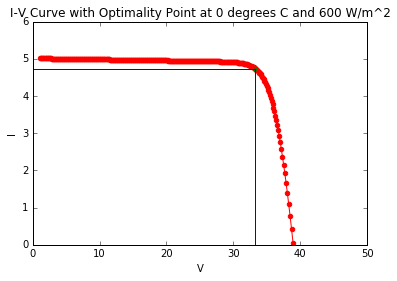

In [53]:
v_values = np.array([1.130848040019651, 1.2309522038321548, 1.331056367644661, 1.4311605314571691, 1.53126469526968, 1.6313688590821935, 1.7314730228947102, 1.83157718670723, 1.9316813505197528, 2.03178551433228, 2.1318896781448107, 2.2319938419573457, 2.332098005769886, 2.432202169582431, 2.532306333394981, 2.632410497207538, 2.732514661020101, 2.8326188248326716, 2.9327229886452493, 3.032827152457836, 3.1329313162704313, 3.233035480083037, 3.3331396438956533, 3.4332438077082816, 3.5333479715209215, 3.6334521353335765, 3.733556299146245, 3.833660462958931, 3.9337646267716337, 4.033868790584355, 4.133972954397098, 4.234077118209862, 4.3341812820226515, 4.434285445835467, 4.534389609648311, 4.634493773461186, 4.734597937274094, 4.834702101087039, 4.934806264900024, 5.03491042871305, 5.135014592526124, 5.235118756339247, 5.335222920152426, 5.435327083965664, 5.535431247778966, 5.635535411592338, 5.735639575405786, 5.835743739219315, 5.935847903032934, 6.035952066846649, 6.1360562306604685, 6.2361603944744015, 6.33626455828846, 6.4363687221026495, 6.536472885916985, 6.636577049731477, 6.73668121354614, 6.836785377360988, 6.936889541176036, 7.0369937049913025, 7.137097868806804, 7.237202032622562, 7.337306196438599, 7.437410360254935, 7.537514524071599, 7.637618687888618, 7.73772285170602, 7.83782701552384, 7.937931179342112, 8.038035343160875, 8.138139506980169, 8.23824367080004, 8.338347834620539, 8.438451998441716, 8.538556162263628, 8.638660326086342, 8.73876448990992, 8.838868653734439, 8.938972817559977, 9.039076981386621, 9.139181145214465, 9.23928530904361, 9.339389472874165, 9.439493636706253, 9.53959780054, 9.639701964375547, 9.73980612821305, 9.83991029205267, 9.94001445589459, 10.040118619739001, 10.140222783586118, 10.240326947436166, 10.340431111289396, 10.440535275146079, 10.540639439006503, 10.640743602870986, 10.740847766739874, 10.840951930613539, 10.941056094492383, 11.041160258376848, 11.14126442226741, 11.241368586164583, 11.341472750068927, 11.441576913981052, 11.541681077901613, 11.641785241831325, 11.741889405770968, 11.841993569721375, 11.942097733683463, 12.04220189765822, 12.142306061646718, 12.242410225650122, 12.342514389669692, 12.442618553706797, 12.542722717762924, 12.642826881839683, 12.742931045938821, 12.843035210062233, 12.943139374211972, 13.043243538390271, 13.143347702599547, 13.243451866842422, 13.343556031121743, 13.443660195440593, 13.543764359802324, 13.643868524210564, 13.74397268866925, 13.844076853182658, 13.944181017755417, 14.044285182392557, 14.144389347099525, 14.244493511882238, 14.344597676747108, 14.444701841701095, 14.544806006751742, 14.644910171907231, 14.745014337176446, 14.845118502569013, 14.94522266809538, 15.045326833766872, 15.145430999595781, 15.245535165595438, 15.345639331780301, 15.445743498166053, 15.5458476647697, 15.6459518316097, 15.746055998706064, 15.846160166080498, 15.946264333756552, 16.046368501759762, 16.146472670117838, 16.246576838860822, 16.34668100802131, 16.446785177634656, 16.546889347739206, 16.646993518376554, 16.74709768959182, 16.847201861433934, 16.94730603395598, 17.04741020721553, 17.14751438127504, 17.247618556202248, 17.347722732070622, 17.447826908959865, 17.547931086956417, 17.648035266154046, 17.748139446654456, 17.84824362856796, 17.94834781201422, 18.048451997123024, 18.148556184035154, 18.248660372903313, 18.348764563893127, 18.44886875718426, 18.548972952971578, 18.649077151466454, 18.74918135289816, 18.849285557515376, 18.94938976558785, 19.049493977408158, 19.149598193293663, 19.249702413588594, 19.349806638666333, 19.44991086893188, 19.550015104824524, 19.65011934682076, 19.750223595437415, 19.8503278512351, 19.95043211482189, 20.050536386857345, 20.150640668056884, 20.250744959196492, 20.35084926111788, 20.450953574734026, 20.551057901035207, 20.651162241095573, 20.751266596080217, 20.851370967252894, 20.951475355984368, 21.051579763761485, 21.15168419219698, 21.251788643040168, 21.351893118188475, 21.451997619700006, 21.55210214980714, 21.65220671093129, 21.752311305698907, 21.852415936958845, 21.952520607801194, 22.052625321577704, 22.15273008192394, 22.25283489278333, 22.35293975843321, 22.453044683513113, 22.55314967305545, 22.653254732518754, 22.75335986782377, 22.853465085392617, 22.953570392191203, 23.05367579577531, 23.153781304340512, 23.25388692677638, 23.353992672725234, 23.454098552645867, 23.55420457788272, 23.65431076074084, 23.754417114567254, 23.854523653839166, 23.954630394259695, 24.054737352861654, 24.15484454812016, 24.254952000074766, 24.355059730461928, 24.455167762858686, 24.55527612283855, 24.65538483814052, 24.755493938852485, 24.8556034576101, 24.95571342981255, 25.055823893856523, 25.15593489139007, 25.256046467587897, 25.356158671450007, 25.456271556125618, 25.556385179264495, 25.656499603398064, 25.756614896352772, 25.856731131698464, 25.9568483892347, 26.056966755518307, 26.15708632443554, 26.257207197822733, 26.357329486139502, 26.457453309198932, 26.55757879695961, 26.657706090384735, 26.757835342373948, 26.857966718774094, 26.958100399475562, 27.058236579601456, 27.15837547079747, 27.25851730263098, 27.358662324108625, 27.458810805322365, 27.55896303923495, 27.65911934361656, 27.759280063145443, 27.859445571686443, 27.95961627476244, 28.059792612235082, 28.159975061212542, 28.260164139203425, 28.360360407537836, 28.46056447507804, 28.560777002243427, 28.66099870537621, 28.761230361476873, 28.861472813340573, 28.96172697512848, 29.061993838410906, 29.162274478722107, 29.262570062670207, 29.362881855649096, 29.463211230203402, 29.563559675101782, 29.6639288051785, 29.764320372008388, 29.864736275485743, 29.96517857638367, 30.06564950997696, 30.16615150081849, 30.266687178766873, 30.367259396371296, 30.46787124772846, 30.568526088936284, 30.66922756027958, 30.769979610294378, 30.870786521869938, 30.971652940561047, 31.07258390529773, 31.17358488169538, 31.27466179818553, 31.375821085206095, 31.47706971771015, 31.578415261274262, 31.67986592211118, 31.781430601317464, 31.88311895371471, 31.984941451673308, 32.086909454340656, 32.18903528273144, 32.291332301176446, 32.39381500566823, 32.4964991196877, 32.599401698145115, 32.70254124012257, 32.80593781116321, 32.909613175915716, 33.013590942010715, 33.11789671612044, 33.22255827323311, 33.32760574026108, 33.43307179519654, 33.53899188313131, 33.645404450568634, 33.752351199576026, 33.85987736345921, 33.96803200577951, 34.076868344691356, 34.18644410474397, 34.29682189847285, 34.408069640303566, 34.520260995504, 34.633475867152875, 34.747800924343636, 34.8633301751156, 34.98016558789946, 35.09841776558554, 35.21820667667062, 35.3396624483166, 35.462926226563674, 35.588151109384356, 35.71550315874655, 35.845162498375764, 35.977324504473444, 36.112201097262684, 36.25002214189911, 36.39103696800781, 36.53551601789128, 36.6837526343039, 36.836064999611224, 36.99279823915291, 37.154326702713796, 37.32105643918481, 37.493427880772686, 37.6719187545026, 37.857047240260286, 38.04937539625023, 38.24951287451395, 38.45812095107015, 38.67591689731813, 38.903678721601906, 39.14225031227943])
i_values = np.array([5.013281488894728, 5.012972297398396, 5.012663105902056, 5.01235391440571, 5.012044722909357, 5.011735531412995, 5.011426339916625, 5.011117148420245, 5.0108079569238555, 5.010498765427454, 5.010189573931041, 5.0098803824346145, 5.009571190938175, 5.009261999441718, 5.0089528079452466, 5.008643616448755, 5.008334424952246, 5.008025233455714, 5.00771604195916, 5.007406850462581, 5.007097658965974, 5.006788467469338, 5.006479275972671, 5.006170084475968, 5.0058608929792285, 5.005551701482447, 5.005242509985623, 5.0049333184887494, 5.004624126991825, 5.004314935494843, 5.004005743997801, 5.003696552500693, 5.003387361003512, 5.003078169506253, 5.002768978008909, 5.002459786511475, 5.002150595013939, 5.001841403516297, 5.001532212018536, 5.00122302052065, 5.000913829022624, 5.00060463752445, 5.000295446026112, 4.9999862545276, 4.999677063028896, 4.999367871529985, 4.99905868003085, 4.998749488531472, 4.998440297031829, 4.9981311055318995, 4.997821914031658, 4.997512722531082, 4.997203531030138, 4.996894339528799, 4.9965851480270285, 4.9962759565247925, 4.99596676502205, 4.995657573518757, 4.995348382014871, 4.995039190510337, 4.994729999005104, 4.994420807499109, 4.994111615992291, 4.993802424484579, 4.993493232975896, 4.9931840414661615, 4.992874849955287, 4.992565658443174, 4.992256466929718, 4.991947275414806, 4.991638083898316, 4.991328892380111, 4.991019700860049, 4.99071050933797, 4.990401317813706, 4.990092126287069, 4.989782934757861, 4.9894737432258625, 4.9891645516908385, 4.988855360152531, 4.988546168610664, 4.9882369770649335, 4.987927785515015, 4.987618593960552, 4.98730940240116, 4.987000210836424, 4.986691019265887, 4.986381827689062, 4.986072636105414, 4.985763444514367, 4.985454252915292, 4.985145061307513, 4.984835869690289, 4.984526678062823, 4.984217486424245, 4.9839082947736175, 4.983599103109918, 4.983289911432039, 4.982980719738782, 4.982671528028844, 4.9823623363008105, 4.982053144553152, 4.981743952784205, 4.981434760992168, 4.981125569175084, 4.980816377330835, 4.9805071854571175, 4.980197993551439, 4.97988880161109, 4.979579609633138, 4.979270417614397, 4.978961225551412, 4.97865203344044, 4.9783428412774136, 4.978033649057928, 4.977724456777201, 4.977415264430047, 4.977106072010841, 4.976796879513482, 4.9764876869313515, 4.976178494257272, 4.975869301483458, 4.975560108601464, 4.9752509156021265, 4.974941722475514, 4.9746325292108455, 4.9743233357964325, 4.974014142219595, 4.973704948466578, 4.973395754522464, 4.973086560371071, 4.972777365994847, 4.9724681713747545, 4.972158976490142, 4.971849781318612, 4.971540585835868, 4.971231390015558, 4.970922193829097, 4.970612997245478, 4.970303800231075, 4.969994602749406, 4.969685404760908, 4.969376206222659, 4.969067007088112, 4.968757807306771, 4.968448606823868, 4.968139405579995, 4.967830203510717, 4.967521000546139, 4.967211796610449, 4.966902591621416, 4.966593385489845, 4.966284178118987, 4.965974969403906, 4.965665759230771, 4.965356547476121, 4.965047334006035, 4.964738118675255, 4.96442890132622, 4.96411968178803, 4.963810459875311, 4.963501235386995, 4.963192008104984, 4.962882777792716, 4.962573544193594, 4.962264307029296, 4.96195506599793, 4.961645820772042, 4.961336570996448, 4.96102731628589, 4.960718056222485, 4.960408790352968, 4.960099518185689, 4.959790239187368, 4.959480952779566, 4.959171658334867, 4.958862355172723, 4.95855304255496, 4.958243719680898, 4.957934385682057, 4.957625039616414, 4.957315680462179, 4.957006307111042, 4.956696918360838, 4.956387512907609, 4.95607808933698, 4.9557686461148105, 4.9554591815770515, 4.955149693918746, 4.954840181182099, 4.95453064124353, 4.954221071799642, 4.953911470351993, 4.953601834190571, 4.953292160375893, 4.952982445719567, 4.9526726867632105, 4.952362879755596, 4.952053020627853, 4.95174310496656, 4.951433127984587, 4.951123084489431, 4.950812968848908, 4.950502774953905, 4.950192496178009, 4.949882125333695, 4.9495716546248145, 4.949261075595058, 4.948950379072055, 4.948639555106738, 4.948328592907578, 4.948017480769239, 4.947706205995206, 4.947394754813851, 4.947083112287394, 4.946771262213159, 4.94645918701646, 4.946146867634432, 4.94583428339, 4.945521411855211, 4.9452082287029535, 4.9448947075461565, 4.944580819763345, 4.94426653430945, 4.943951817510564, 4.943636632841359, 4.943320940683614, 4.943004698064332, 4.942687858371655, 4.942370371046739, 4.942052181249526, 4.941733229496228, 4.9414134512661, 4.941092776574925, 4.940771129512377, 4.940448427740215, 4.940124581947977, 4.939799495262591, 4.939473062607987, 4.939145170010493, 4.938815693845392, 4.938484500019708, 4.938151443085768, 4.937816365279714, 4.937479095478595, 4.937139448069152, 4.936797221720806, 4.936452198054754, 4.936104140200362, 4.93575279122932, 4.935397872457197, 4.935039081601191, 4.93467609078186, 4.934308544355661, 4.933936056563953, 4.933558208982907, 4.9331745477575, 4.932784580601273, 4.9323877735420485, 4.931983547392073, 4.931571273919263, 4.931150271694244, 4.930719801585718, 4.930279061874392, 4.929827182953176, 4.929363221578579, 4.92888615463536, 4.928394872373151, 4.927888171070401, 4.927364745077093, 4.926823178183678, 4.926261934259133, 4.925679347096286, 4.925073609397246, 4.9244427608261665, 4.9237846750503245, 4.923097045683879, 4.922377371041371, 4.92162293760019, 4.92083080206267, 4.919997771899259, 4.919120384244106, 4.918194883003599, 4.917217194026475, 4.916182898171424, 4.915087202094084, 4.913924906560374, 4.912690372076643, 4.911377481609483, 4.909979600148714, 4.908489530846275, 4.9068994674410344, 4.905200942655059, 4.9033847722201696, 4.901440994164814, 4.899358802959877, 4.897126478088096, 4.894731306564917, 4.892159498898556, 4.889396097933782, 4.886424879976763, 4.88322824754741, 4.879787113050202, 4.8760807725945465, 4.872086769130494, 4.867780743995125, 4.863136275888186, 4.858124706212562, 4.852714949624955, 4.846873288544426, 4.840563150260368, 4.8337448651664925, 4.82637540452259, 4.81840809601056, 4.8097923152043425, 4.800473150914219, 4.7903910421932165, 4.7794813846060125, 4.767674103157577, 4.75489318905836, 4.741056197263782, 4.726073701466497, 4.709848702938605, 4.692275989315946, 4.673241439085668, 4.652621267179367, 4.630281206684711, 4.606075621266251, 4.579846542427977, 4.551422625253449, 4.520618015720274, 4.4872311221013526, 4.451043282331077, 4.411817318527087, 4.369295969112143, 4.323200188171564, 4.273227300804062, 4.219049002271759, 4.160309187722715, 4.0966215981391745, 4.027567266949969, 3.952691750427719, 3.871502123562259, 3.783463721551324, 3.687996605367887, 3.5844717280396448, 3.4722067762975697, 3.3504616601045476, 3.2184336202472923, 3.0752519216500973, 2.919972097330174, 2.7515697049439884, 2.5689335546517813, 2.3708583635327916, 2.1560367879927314, 1.9230507814931916, 1.6703622204729036, 1.3963027364928353, 1.0990626873900486, 0.7766791945333041, 0.42702316710023147, 0.04778522759911166, -0.3635395544047092])
opt_v = np.array([33.2773760975])
opt_i = np.array([4.73337945862])
plt.scatter(v_values, i_values, color = "r")
plt.scatter(opt_v, opt_i, color = 'g')
plt.plot(v_values, i_values, color = "r")
xs = np.linspace(0,33.2773760975,100)
ys = np.array([4.73337945862 for t in xrange(len(xs))])
plt.plot(xs, ys, 'b')
ys = np.linspace(0,4.73337945862,100)
xs = np.array([33.2773760975 for t in xrange(len(ys))])
plt.plot(xs,ys,'b')
plt.ylabel("I")
plt.xlabel("V")
plt.title("I-V Curve with Optimality Point at 0 degrees C and 600 W/m^2")
# x = numpy.linspace(0, 150, 1000)
xlim(0, 50)
ylim(0, 6)
plt.show()

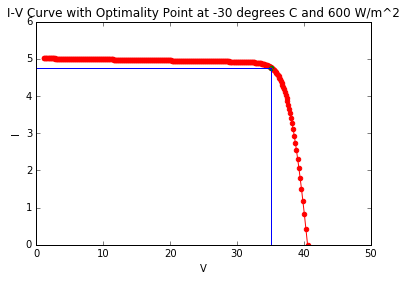

In [66]:
v_values = np.array([1.1308480400193874, 1.2309522038318663, 1.3310563676443457, 1.4311605314568248, 1.5312646952693036, 1.631368859081783, 1.731473022894262, 1.8315771867067416, 1.9316813505192207, 2.0317855143317005, 2.1318896781441796, 2.231993841956659, 2.3320980057691383, 2.432202169581618, 2.5323063333940965, 2.632410497206576, 2.7325146610190547, 2.8326188248315347, 2.932722988644014, 3.032827152456493, 3.132931316268973, 3.233035480081452, 3.333139643893932, 3.433243807706412, 3.533347971518892, 3.633452135331372, 3.733556299143852, 3.833660462956333, 3.9337646267688133, 4.033868790581295, 4.133972954393775, 4.234077118206256, 4.334181282018738, 4.43428544583122, 4.534389609643702, 4.634493773456184, 4.734597937268667, 4.834702101081151, 4.934806264893634, 5.034910428706118, 5.135014592518603, 5.235118756331088, 5.335222920143575, 5.435327083956061, 5.535431247768549, 5.635535411581037, 5.7356395753935265, 5.835743739206016, 5.935847903018508, 6.035952066831, 6.1360562306434945, 6.23616039445599, 6.336264558268488, 6.436368722080987, 6.536472885893488, 6.63657704970599, 6.736681213518496, 6.836785377331004, 6.936889541143514, 7.0369937049560285, 7.137097868768545, 7.237202032581066, 7.337306196393591, 7.43741036020612, 7.537514524018654, 7.637618687831194, 7.737722851643738, 7.83782701545629, 7.9379311792688485, 8.038035343081415, 8.138139506893989, 8.238243670706574, 8.338347834519167, 8.438451998331772, 8.538556162144388, 8.63866032595702, 8.738764489769665, 8.838868653582324, 8.938972817395003, 9.0390769812077, 9.139181145020418, 9.239285308833159, 9.339389472645925, 9.439493636458717, 9.539597800271542, 9.639701964084399, 9.73980612789729, 9.839910291710222, 9.9400144555232, 10.040118619336221, 10.140222783149298, 10.24032694696243, 10.340431110775624, 10.440535274588887, 10.540639438402225, 10.640743602215647, 10.740847766029157, 10.840951929842767, 10.941056093656485, 11.04116025747032, 11.141264421284285, 11.241368585098394, 11.341472748912658, 11.441576912727092, 11.541681076541714, 11.64178524035654, 11.74188940417159, 11.841993567986888, 11.942097731802454, 12.042201895618316, 12.1423060594345, 12.24241022325104, 12.342514387067968, 12.44261855088532, 12.54272271470314, 12.64282687852147, 12.74293104234036, 12.843035206159863, 12.943139369980036, 13.043243533800947, 13.143347697622662, 13.243451861445262, 13.343556025268828, 13.443660189093457, 13.543764352919245, 13.643868516746306, 13.743972680574762, 13.844076844404746, 13.944181008236404, 14.044285172069895, 14.144389335905396, 14.244493499743097, 14.344597663583214, 14.444701827425972, 14.544805991271623, 14.64491015512045, 14.745014318972748, 14.845118482828855, 14.945222646689135, 15.045326810553984, 15.145430974423842, 15.245535138299184, 15.345639302180539, 15.445743466068476, 15.545847629963632, 15.64595179386669, 15.746055957778411, 15.84616012169962, 15.946264285631225, 16.04636844957422, 16.146472613529696, 16.246576777498845, 16.346680941482973, 16.446785105483514, 16.54688926950204, 16.646993433540263, 16.74709759760007, 16.84720176168353, 16.947305925792897, 17.047410089930654, 17.147514254099512, 17.247618418302444, 17.347722582542712, 17.447826746823885, 17.54793091114987, 17.64803507552496, 17.74813923995384, 17.848243404441657, 17.948347568994052, 18.048451733617195, 18.148555898317852, 18.248660063103433, 18.34876422798206, 18.448868392962627, 18.54897255805488, 18.64907672326951, 18.749180888618202, 18.84928505411379, 18.949389219770303, 19.049493385603146, 19.149597551629164, 19.249701717866838, 19.3498058843364, 19.449910051060026, 19.55001421806201, 19.650118385368962, 19.750222553010047, 19.85032672101721, 19.950430889425462, 20.050535058273148, 20.150639227602284, 20.25074339745891, 20.350847567893457, 20.45095173896119, 20.55105591072265, 20.65116008324417, 20.751264256598425, 20.851368430865037, 20.951472606131244, 21.051576782492624, 21.151680960053895, 21.25178513892979, 21.351889319246006, 21.45199350114026, 21.552097684763446, 21.65220187028088, 21.752306057873678, 21.852410247740284, 21.952514440098117, 22.052618635185375, 22.15272283326304, 22.25282703461705, 22.352931239560675, 22.45303544843715, 22.553139661622517, 22.653243879528784, 22.753348102607347, 22.853452331352774, 22.953556566306908, 23.05366080806341, 23.153765057272704, 23.253869314647403, 23.353973580968265, 23.4540778570907, 23.5541821439519, 23.654286442578673, 23.754390754096022, 23.854495079736502, 23.954599420850528, 24.054703778917638, 24.15480815555884, 24.254912552550135, 24.355016971837344, 24.455121415552345, 24.55522588603085, 24.655330385831913, 24.755434917759278, 24.85553948488477, 24.955644090573937, 25.055748738514136, 25.15585343274529, 25.25595817769361, 25.356062978208538, 25.456167839603193, 25.55627276769873, 25.656377768872904, 25.75648285011329, 25.8565880190756, 25.95669328414756, 26.05679865451891, 26.15690414025809, 26.257009752396247, 26.35711550301931, 26.457221405368813, 26.55732747395243, 26.657433724665005, 26.7575401749212, 26.857646843800833, 26.957753752208067, 27.057860923045872, 27.157968381407137, 27.25807615478406, 27.358184273297567, 27.45829276994867, 27.558401680893834, 27.658511045746714, 27.758620907908718, 27.85873131493117, 27.958842318912115, 28.058953976931086, 28.159066351525382, 28.25917951121197, 28.359293531059194, 28.459408493313244, 28.55952448808446, 28.659641614099282, 28.759759979524098, 28.85987970286787, 28.96000091397106, 29.060123755089112, 29.16024838207955, 29.26037496570256, 29.360503693045942, 29.460634769086322, 29.56076841839962, 29.660904887035088, 29.761044444568522, 29.86118738635182, 29.96133403597761, 30.061484747979552, 30.161639910790832, 30.26179994998555, 30.361965331830035, 30.46213656717369, 30.56231421571195, 30.662498890656774, 30.762691263853753, 30.862892071388504, 30.96310211972911, 31.06332229245591, 31.163553557634764, 31.263796975895296, 31.364053709281624, 31.464325030949308, 31.564612335789526, 31.6649171520691, 31.76524115418351, 31.865586176629304, 31.96595422931252, 32.066347514320874, 32.16676844429961, 32.267219662584466, 32.36770406525964, 32.468224825324896, 32.56878541917347, 32.66938965560175, 32.77004170759268, 32.87074614713833, 32.971507983392016, 33.07233270446847, 33.17322632324081, 33.27419542751646, 33.375247235010804, 33.47638965357724, 33.57763134719628, 33.678981808274315, 33.780451436855444, 33.88205162740723, 33.9837948639048, 34.085694824006474, 34.18776649319053, 34.29002628980526, 34.39249220207611, 34.49518393821297, 34.598123090870324, 34.701333317332654, 34.80484053692868, 34.908673147321736, 35.012862261481324, 35.11744196731318, 35.22244961211443, 35.327926114227665, 35.433916304494375, 35.54046930035732, 35.64763891573353, 35.755484110078164, 35.864069480386675, 35.97346580024085, 36.083750610396955, 36.19500886584422, 36.30733364473339, 36.42082692509094, 36.535600435800646, 36.65177658895364, 36.76948950134717, 36.8888861136563, 37.01012741661771, 37.13338979445775, 37.25886649677544, 37.38676925116283, 37.517330030019686, 37.65080298630606, 37.78746657438627, 37.927625873662016, 38.071615134384984, 38.21980056689293, 38.37258339754489, 38.530403216856406, 38.6937416477743, 38.86312636470161, 39.03913549681071, 39.222402452389034, 39.413621204475405, 39.613552081894326, 39.823028114012956, 40.0429619821663, 40.27435363575835, 40.518298636593954, 40.77599730107249])
i_values = np.array([5.013281488895511, 5.012972297399252, 5.012663105902992, 5.012353914406733, 5.012044722910474, 5.011735531414214, 5.011426339917954, 5.011117148421694, 5.010807956925435, 5.0104987654291735, 5.010189573932914, 5.009880382436654, 5.0095711909403935, 5.009261999444132, 5.008952807947872, 5.008643616451611, 5.0083344249553505, 5.0080252334590885, 5.007716041962828, 5.007406850466566, 5.007097658970304, 5.006788467474042, 5.00647927597778, 5.006170084481516, 5.005860892985253, 5.005551701488989, 5.005242509992725, 5.004933318496461, 5.004624127000196, 5.004314935503929, 5.004005744007664, 5.003696552511397, 5.003387361015129, 5.003078169518861, 5.002768978022591, 5.0024597865263205, 5.002150595030049, 5.001841403533776, 5.0015322120375005, 5.001223020541226, 5.000913829044948, 5.000604637548669, 5.000295446052387, 4.999986254556105, 4.999677063059819, 4.999367871563531, 4.99905868006724, 4.9987494885709465, 4.998440297074649, 4.998131105578349, 4.997821914082043, 4.997512722585734, 4.997203531089419, 4.9968943395931005, 4.996585148096775, 4.996275956600444, 4.995966765104106, 4.99565757360776, 4.995348382111406, 4.995039190615042, 4.994729999118669, 4.9944208076222845, 4.994111616125888, 4.993802424629479, 4.993493233133055, 4.993184041636615, 4.992874850140159, 4.992565658643683, 4.992256467147186, 4.991947275650666, 4.991638084154123, 4.991328892657552, 4.99101970116095, 4.990710509664316, 4.990401318167646, 4.990092126670937, 4.989782935174185, 4.989473743677385, 4.989164552180535, 4.988855360683626, 4.988546169186657, 4.988236977689619, 4.9879277861925075, 4.987618594695314, 4.98730940319803, 4.98700021170065, 4.986691020203161, 4.986381828705556, 4.986072637207821, 4.985763445709946, 4.985454254211915, 4.985145062713715, 4.9848358712153304, 4.984526679716742, 4.98421748821793, 4.983908296718876, 4.983599105219552, 4.983289913719937, 4.98298072222, 4.982671530719712, 4.982362339219038, 4.982053147717942, 4.981743956216384, 4.98143476471432, 4.981125573211699, 4.980816381708472, 4.980507190204577, 4.9801979986999525, 4.979888807194527, 4.979579615688227, 4.979270424180966, 4.978961232672653, 4.978652041163188, 4.978342849652458, 4.978033658140347, 4.977724466626719, 4.97741527511143, 4.977106083594322, 4.97679689207522, 4.9764877005539345, 4.976178509030255, 4.975869317503954, 4.9755601259747815, 4.975250934442461, 4.974941742906693, 4.974632551367146, 4.974323359823461, 4.97401416827524, 4.973704976722052, 4.9733957851634205, 4.973086593598825, 4.9727774020276945, 4.972468210449406, 4.972159018863273, 4.971849827268548, 4.971540635664406, 4.97123144404995, 4.970922252424192, 4.970613060786051, 4.970303869134344, 4.969994677467773, 4.969685485784919, 4.969376294084221, 4.969067102363978, 4.968757910622315, 4.968448718857189, 4.968139527066354, 4.967830335247354, 4.967521143397493, 4.967211951513821, 4.966902759593106, 4.966593567631807, 4.96628437562604, 4.965975183571557, 4.965665991463697, 4.965356799297359, 4.965047607066949, 4.964738414766341, 4.964429222388824, 4.964120029927043, 4.963810837372941, 4.9635016447176925, 4.963192451951624, 4.96288325906414, 4.96257406604363, 4.962264872877376, 4.9619556795514415, 4.961646486050559, 4.961337292357999, 4.961028098455436, 4.960718904322787, 4.960409709938055, 4.9601005152771345, 4.959791320313619, 4.959482125018573, 4.959172929360298, 4.958863733304063, 4.958554536811814, 4.958245339841864, 4.957936142348533, 4.957626944281779, 4.957317745586773, 4.9570085462034434, 4.956699346065972, 4.956390145102254, 4.956080943233282, 4.9557717403725, 4.955462536425073, 4.955153331287102, 4.954844124844746, 4.954534916973286, 4.954225707536075, 4.9539164963834, 4.953607283351232, 4.95329806825986, 4.952988850912388, 4.952679631093096, 4.952370408565632, 4.952061183071051, 4.951751954325643, 4.951442722018577, 4.951133485809291, 4.950824245324671, 4.950515000155918, 4.95020574985515, 4.949896493931656, 4.94958723184781, 4.9492779630145725, 4.9489686867865865, 4.948659402456787, 4.948350109250501, 4.948040806318982, 4.947731492732332, 4.947422167471736, 4.947112829420964, 4.9468034773570535, 4.946494109940107, 4.946184725702111, 4.945875323034682, 4.945565900175649, 4.945256455194345, 4.944946985975503, 4.944637490201593, 4.944327965333495, 4.944018408589302, 4.943708816921111, 4.943399186989583, 4.943089515136087, 4.9427797973521574, 4.9424700292460555, 4.942160206006111, 4.9418503223605805, 4.941540372533647, 4.9412303501972294, 4.94092024841817, 4.940610059600383, 4.940299775421464, 4.939989386763248, 4.93967888363571, 4.939368255093612, 4.939057489145159, 4.938746572651935, 4.938435491219264, 4.938124229076092, 4.937812768943379, 4.9375010918899145, 4.937189177174332, 4.9368770020720385, 4.936564541685574, 4.936251768736856, 4.935938653339542, 4.935625162749646, 4.935311261092286, 4.9349969090623285, 4.934682063596388, 4.93436667751348, 4.934050699121301, 4.933734071784876, 4.933416733453948, 4.933098616145183, 4.9327796453748745, 4.932459739537385, 4.932138809224173, 4.931816756477699, 4.931493473973993, 4.931168844127066, 4.930842738107678, 4.930515014768295, 4.930185519465246, 4.929854082768256, 4.9295205190466, 4.92918462492005, 4.928846177561728, 4.92850493283866, 4.928160623274556, 4.927812955817775, 4.927461609395896, 4.927106232236432, 4.926746438931387, 4.926381807221114, 4.926011874470667, 4.925636133809221, 4.925254029900366, 4.924864954307953, 4.924468240418854, 4.924063157880229, 4.923648906504923, 4.923224609594086, 4.922789306621353, 4.922341945217475, 4.921881372388566, 4.921406324894644, 4.9209154187082085, 4.920407137464875, 4.91987981980968, 4.919331645533488, 4.91876062038379, 4.918164559423164, 4.917541068796496, 4.916887525754866, 4.916201056769339, 4.915478513552078, 4.914716446784659, 4.913911077334354, 4.913058264718198, 4.91215347255168, 4.911191730693725, 4.9101675937720985, 4.909075095743104, 4.907907700106424, 4.906658245359628, 4.905318885237202, 4.903881023235384, 4.902335240876468, 4.900671219113909, 4.898877652222432, 4.896942153454526, 4.89485115167609, 4.892589778118653, 4.890141742303163, 4.8874891960999385, 4.884612584790431, 4.881490483887894, 4.8780994203553245, 4.874413676728733, 4.8704050765112425, 4.866042749047147, 4.861292871913887, 4.856118388682251, 4.850478699689597, 4.844329323245644, 4.837621524443717, 4.830301908479944, 4.822311975086739, 4.813587630362477, 4.804058651923636, 4.793648102916299, 4.782271689997017, 4.769837059925608, 4.756243028900082, 4.7413787382027035, 4.725122729111267, 4.707341929355938, 4.687890542663899, 4.666608832125316, 4.643321787228127, 4.617837663438369, 4.58994638213921, 4.559417777576581, 4.525999676182567, 4.489415792249034, 4.449363422391345, 4.405510919563099, 4.357494925543102, 4.304917338800407, 4.247341992434971, 4.184291014472173, 4.115240840138742, 4.0396178428435325, 3.956793547404725, 3.8660793855790496, 3.7667209501291845, 3.657891699480949, 3.538686060437199, 3.408111871392275, 3.2650821029874777, 3.1084057871184845, 2.9367780785995032, 2.7487693665511954, 2.5428133446495798, 2.317193940685078, 2.0700309963620867, 1.7992645778405305, 1.5026377860947213, 1.1776779236461952, 0.8216758605115523, 0.43166342717920536, 0.004388645964986532, -0.46371140594161886])
opt_v = np.array([35.1174419673])
opt_i = np.array([4.7562430289])
plt.scatter(v_values, i_values, color = "r")
plt.scatter(opt_v, opt_i, color = 'g')
plt.plot(v_values, i_values, color = "r")
xs = np.linspace(0,35.1174419673,100)
ys = np.array([4.7562430289 for t in xrange(len(xs))])
plt.plot(xs, ys, 'b')
ys = np.linspace(0,4.7562430289,100)
xs = np.array([35.1174419673 for t in xrange(len(ys))])
plt.plot(xs,ys,'b')
plt.ylabel("I")
plt.xlabel("V")
plt.title("I-V Curve with Optimality Point at -30 degrees C and 600 W/m^2")
# x = numpy.linspace(0, 150, 1000)
xlim(0, 50)
ylim(0, 6)
plt.show()